## 데이터 불러오기

<Axes: >

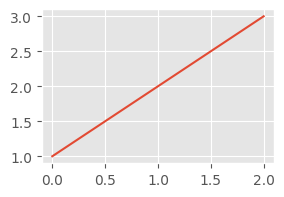

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
plt.style.use('ggplot')
pd.Series([1,2,3]).plot(figsize=(3,2))

In [2]:
#df = pd.read_csv('https://raw.githubusercontent.com/JayoungKim-ai/ML_dataset/main/advertising.csv')
df=pd.read_csv('data/advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


## 데이터 이해

#### 매체별 광고비에 따른 판매량

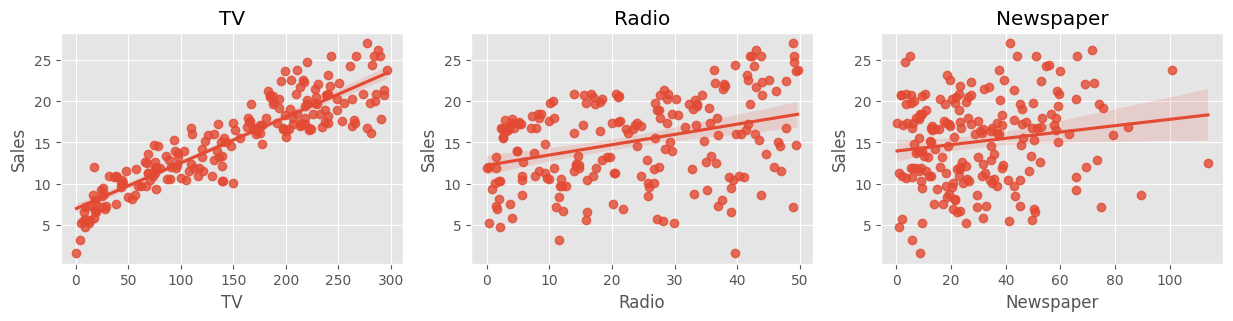

In [4]:
#시각화화

plt.figure(figsize=(15,3))
#산점도(scatterplot), regplot은 회귀선을 그어줌 하지만 산점도의 추가기능은 사용 못함.

#TV 광고비에 따른 판매량량

plt.subplot(1,3,1)
sns.regplot(data=df, x='TV', y='Sales')
plt.title('TV')
#Radio

plt.subplot(1,3,2)
sns.regplot(data=df, x='Radio', y='Sales')
plt.title('Radio')

#Newspaper

plt.subplot(1,3,3)
sns.regplot(data=df, x='Newspaper', y='Sales')
plt.title('Newspaper')

pass

#### 상관계수

<Axes: >

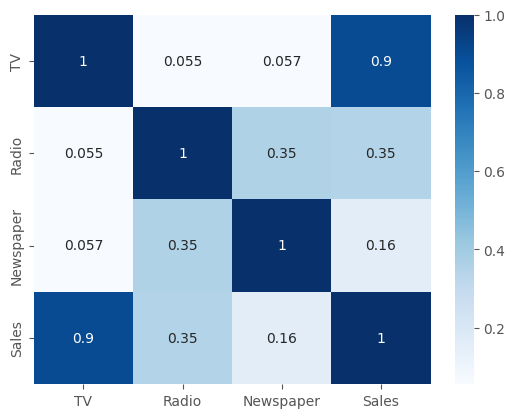

In [5]:
#상관계수 히트맵 시각화
  #data frame object

sns.heatmap(df.corr(),cmap='Blues',annot=True)

#### 독립변수, 종속변수 선택

In [6]:
X=df[['TV']]  ##독립변수는 2차원
y=df['Sales']

#### 훈련세트,테스트세트분할

In [14]:
#훈련세트 테스트세트분할

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((150, 1), (50, 1), (150,), (50,))

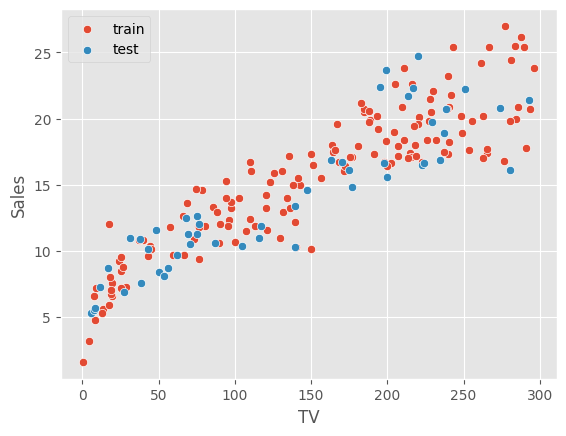

In [22]:
#훈련세트 테스트세트 분할(시각화)
sns.scatterplot(x=X_train['TV'],y=y_train,label='train')
sns.scatterplot(x=X_test['TV'],y=y_test,label='test')
plt.legend()
pass


#### 모델 생성 및 훈련

In [26]:
from sklearn.linear_model import LinearRegression

#모델 생성하기(빈모델)
model=LinearRegression()

#훈련데이터로 모델 훈련하기
model.fit(X_train,y_train)

LinearRegression()

#### 테스트세트로 평가

In [35]:
#모델 평가를 위한 함수 import
from sklearn.metrics import mean_squared_error,root_mean_squared_error,mean_absolute_error,r2_score

#테스트 데이터의 예측값
pred=model.predict(X_test)
#print(pred)
#print(y_test)

#예측값과 실제값의 차이(Loss/Error) 이용한 모델 평가
mse=mean_squared_error(y_test,pred)
rmse=root_mean_squared_error(y_test,pred)
mae=mean_absolute_error(y_test,pred)
r2=r2_score(y_test,pred)

print(
    f'MSE\t: {mse:.2f}\n'
    f'RMSE\t: {rmse:.2f}\n'
    f'MAE\t: {mae:.2f}\n'
    f'r2\t: {r2:.2f}'
)

MSE	: 5.51
RMSE	: 2.35
MAE	: 1.87
r2	: 0.80


In [36]:
#실제값과 모델의 예측값 비교
df_pred = pd.DataFrame({'X_test':X_test['TV'],
    'y_test':y_test,
    'y_pred':pred})
df_pred['error'] = df_pred['y_test']-df_pred['y_pred']
df_pred.head(10)

,X_test,y_test,y_pred,error
95,163.3,16.9,16.143474,0.756526
15,195.4,22.4,17.921382,4.478618
30,292.9,21.4,23.321569,-1.921569
158,11.7,7.3,7.746876,-0.446876
128,220.3,24.7,19.300506,5.399494
115,75.1,12.6,11.258382,1.341618
69,216.8,22.3,19.106654,3.193346
170,50.0,8.4,9.868180,-1.468180
174,222.4,16.5,19.416818,-2.916818
45,175.1,16.1,16.797035,-0.697035


In [42]:
mae = abs(df_pred['error']).mean()
mse = np.square(df_pred['error']).mean()
rmse = np.sqrt(mse)
 
# r2_score
rss = np.square(df_pred['y_test'] - df_pred['y_pred']).sum()
tss = np.square(df_pred['y_test'] - df_pred['y_test'].mean()).sum()
r2 = 1 - (rss/tss)
 
print(f'''
mse : {mse:.2f}
rmse : {rmse:.2f}
mae : {mae:.2f}
r2 : {r2:.2f}
      ''')


mse : 5.51
rmse : 2.35
mae : 1.87
r2 : 0.80
      


#### 모델의 학습 결과

In [47]:
#회귀계수
#model의 속성 중에서 뒤에 언더스코어가 붙은 것들은 fit()을 수행하기 전에는 의미가 없고 fit() 수행 이후에만 의미가 있어지는 값들이라고 합니다. scikit-learn 개발자 가이드라인에 명시된 관행이라고 하네요.
#객체의 속성(property)에는 언더바 사용/함수명은 소문자로 시작하고, 클래스명은 대문자로 시작한다는 것은 암묵적인 약속

print('회귀계수:',model.coef_)   
w=model.coef_

#절편
print('절편:',model.intercept_)
b=model.intercept_

#회귀식
print(f'{w}*TV+{b}')

회귀계수: [0.05538653]
절편: 7.098853680118275
[0.05538653]*TV+7.098853680118275


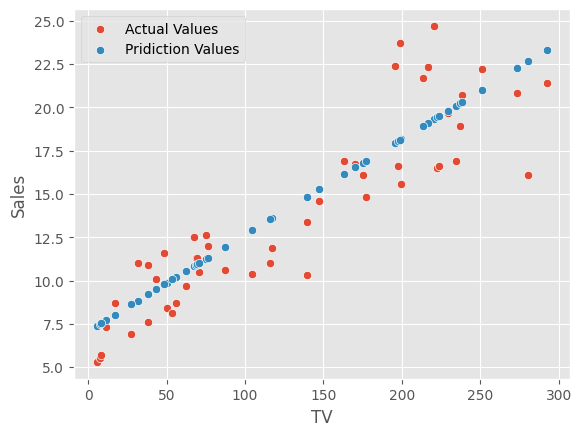

In [50]:
#테스트데이터 실제값과 예측값 확인(독립변수-종속변수 관계 시각화)
sns.scatterplot(x=X_test['TV'],y=y_test,label='Actual Values')
sns.scatterplot(x=X_test['TV'],y=pred,label='Pridiction Values');

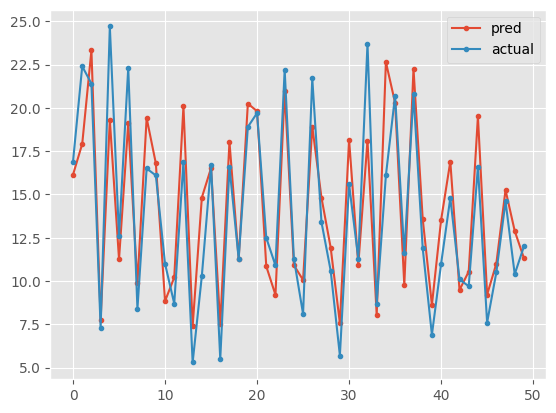

In [58]:
#실제값과 예측값을 비교
plt.plot(pred, marker='.',label='pred')
plt.plot(np.array(y_test), marker='.',label='actual')
plt.legend();

#### 새로운 값 예측하기

In [65]:
# TV 광고비 입력받기
TV=100

#예측 함수 사용하여 예측
print(model.predict([[TV]]))

#모델이 학습한 공식에 대입하여 예측
print(w*TV+b)

[12.63750677]
[12.63750677]


c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## 다중회귀

#### 변수 선택

In [68]:
%whos

Variable                  Type                Data/Info
-------------------------------------------------------
LinearRegression          ABCMeta             <class 'sklearn.linear_mo<...>._base.LinearRegression'>
TV                        int                 100
X                         DataFrame                   TV\n0    230.1\n1<...>n\n[200 rows x 1 columns]
X2                        DataFrame                   TV  Radio  Newspa<...>n\n[200 rows x 3 columns]
X_test                    DataFrame                   TV\n95   163.3\n1<...>3\n143  104.6\n86    76.3
X_train                   DataFrame                   TV\n114   78.2\n1<...>n\n[150 rows x 1 columns]
b                         float64             7.098853680118275
df                        DataFrame                   TV  Radio  Newspa<...>n\n[200 rows x 4 columns]
df_pred                   DataFrame                X_test  y_test     y<...>12.0  11.324846  0.675154
mae                       float64             1.865114691109

In [ ]:
#독립변수 종속변수 선택
X2=df[['TV','Radio','Newspaper']]
y=df['Sales']


<Axes: >

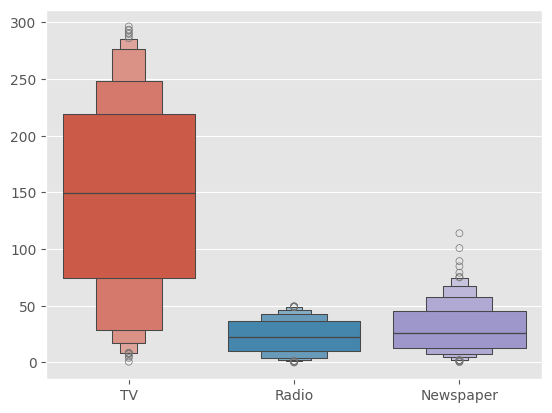

In [69]:
#독립변수의 데이터 분포 파악
sns.boxenplot(X2)

## 독립변수 스케일링

In [78]:
#데이터 스케일링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#scaler.fit(X2)
#X2_scaled=scaler.transform(X2)
X2_scaled=scaler.fit_transform(X2)
scaled_TV=X2_scaled[:,0]
scaled_Radio=X2_scaled[:,1]
scaled_Newspaper=X2_scaled[:,2]

print(f'{scaled_TV.mean()},{scaled_Radio.mean()},{scaled_Newspaper.mean()}')
print(f'{scaled_TV.std()},{scaled_Radio.std()},{scaled_Newspaper.std()}')

1.2212453270876723e-16,-4.529709940470639e-16,2.220446049250313e-16
1.0,1.0,0.9999999999999999


## 훈련 및 평가

#### 모델 훈련

In [79]:
#훈련세트,테스트세트 분할
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X2_scaled,y,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(150, 3) (50, 3) (150,) (50,)


In [82]:
#빈 모델 객체 생성
from sklearn.linear_model import LinearRegression
model2=LinearRegression()

#모델학습
model2.fit(X_train,y_train)

LinearRegression()

#### 모델 성능 평가

In [85]:
# 모델 평가를 위한 함수 import
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score
 
# 테스트 데이터의 예측값
pred = model2.predict(X_test)
 
# 예측값과 실제값의 차이(Loss/Error) 이용한 모델 평가
mse = mean_squared_error(y_test, pred)
rmse = root_mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)
 
print(f'''
mse : {mse:.2f}
rmse : {rmse:.2f}
mae : {mae:.2f}
r2 : {r2:.2f}2
      ''')


mse : 2.40
rmse : 1.55
mae : 1.12
r2 : 0.912
      


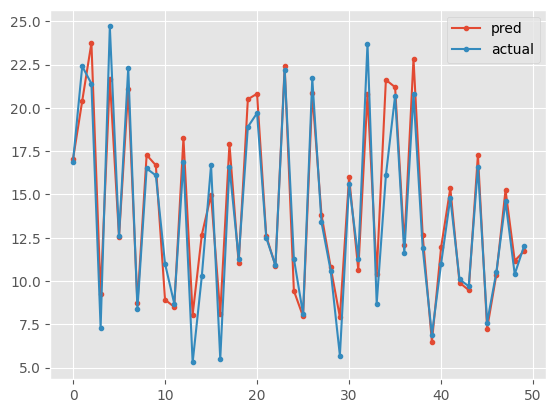

In [86]:
plt.plot(pred, marker='.',label='pred')
plt.plot(np.array(y_test), marker='.',label='actual')
plt.legend();

#### 모델의 학습 결과

In [87]:
# 회귀계수
print(f'회귀계수:{model2.coef_}')
 
# 절편
print(f'회귀계수:{model2.intercept_}')
 
# 회귀식
print(f'{model2.coef_[0]} * TV + {model2.coef_[1]} * Radio + {model2.coef_[2]} * Newspaper + {model2.intercept_}')

회귀계수:[4.67709227 1.4774023  0.09352121]
회귀계수:15.22473459736965
4.677092268978724 * TV + 1.4774023036363388 * Radio + 0.0935212124232997 * Newspaper + 15.22473459736965


#### 새로운 값 예측하기

In [89]:
#예측할 값
new_data=[[175,15,2]]

#예측 함수를 이용한 예측
new_data_scaled=scaler.transform(new_data)   #이미 앞에서 전처리 할때 fit했기 때문에 여기서는 fit하지 않고 전처리한 것만 가져와서 transform.
model2.predict(new_data_scaled)
print(model2.predict(new_data_scaled))
 
# 회귀식에 값을 대입하여 예측
print(f'{model2.coef_[0] * new_data_scaled[0,0] + model2.coef_[1] * new_data_scaled[0,1] +  model2.coef_[2] * new_data_scaled[0,2] + model2.intercept_}')


[15.80426509]
15.804265090536152


c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


#### 다항회귀

In [105]:
#다항식 조합 생성
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=9)
X_poly=poly.fit_transform(X2)
X_poly.shape

#스케일링
scaler=StandardScaler()
X_poly_scaled=scaler.fit_transform(X_poly)

#훈련세트, 테스트세트 분할
X_train, X_test, y_train, y_test=train_test_split(X_poly_scaled,y, random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

#모델 생성 및 학습
model_poly=LinearRegression()
model_poly.fit(X_train,y_train)

#평가
print(f'train:{model_poly.score(X_train,y_train)}')
print(f'test:{model_poly.score(X_test,y_test)}')

(150, 220) (50, 220) (150,) (50,)
train:1.0
test:-14619695.462744264


#### 규제 Ridge

In [102]:
#다항식 조합 생성
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=9)
X_poly=poly.fit_transform(X2)
X_poly.shape

#스케일링
scaler=StandardScaler()
X_poly_scaled=scaler.fit_transform(X_poly)

#훈련세트, 테스트세트 분할
X_train, X_test, y_train, y_test=train_test_split(X_poly_scaled,y, random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

#모델 생성 및 학습
from sklearn.linear_model import Ridge    #Lasso/ Lasso(alah=0.1)
model_poly=Ridge(10)
model_poly.fit(X_train,y_train)

#평가
print(f'train:{model_poly.score(X_train,y_train)}')
print(f'test:{model_poly.score(X_test,y_test)}')

(150, 220) (50, 220) (150,) (50,)
train:0.9216197291137791
test:0.944473790302263
